In [1]:
import warnings
warnings.simplefilter('ignore')

# Installing and Importing Dependencies

In [7]:
!pip install pystan
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/2c/d8/0a6ae9402b5809135026ae6e8aa7802ad613429ffe13cc2727822f33a6b4/holidays-0.35-py3-none-any.whl.metadata
  Using cached holidays-0.35-py3-none-any.whl.metadata (19 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/65/6e/09d8816b5cb7a4006ef8ad1717a2703ad9f331dae9717d9f22488a2d6469/importlib_resources-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/pack

In [8]:
import pandas as pd
from prophet import Prophet

# Read in Data and Process Dates

In [10]:
df = pd.read_csv('dataset.csv')

In [11]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [13]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [14]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [15]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [16]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [20]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [21]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [23]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [25]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

14:51:52 - cmdstanpy - INFO - Chain [1] start processing
14:51:52 - cmdstanpy - INFO - Chain [1] done processing


# Predictions

In [26]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,878.986900,3944.509007,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,768.776370,3912.007185,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,805.906420,4046.018486,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,974.480928,4038.007683,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,942.147846,3955.162521,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.903162,2191.763825,5239.195595,4234.363763,4241.860815,-509.966196,-509.966196,-509.966196,472.568897,...,16.615617,16.615617,16.615617,-999.150710,-999.150710,-999.150710,0.0,0.0,0.0,3727.936966
1176,2021-03-23,4238.989539,2170.933849,5200.475439,4235.391746,4243.004473,-527.435391,-527.435391,-527.435391,472.568897,...,-11.291430,-11.291430,-11.291430,-988.712858,-988.712858,-988.712858,0.0,0.0,0.0,3711.554148
1177,2021-03-24,4240.075916,2206.350481,5327.215439,4236.403129,4244.148130,-512.907214,-512.907214,-512.907214,472.568897,...,-4.423866,-4.423866,-4.423866,-981.052245,-981.052245,-981.052245,0.0,0.0,0.0,3727.168702
1178,2021-03-25,4241.162293,2170.638135,5344.341995,4237.415644,4245.280930,-481.684909,-481.684909,-481.684909,472.568897,...,22.497946,22.497946,22.497946,-976.751752,-976.751752,-976.751752,0.0,0.0,0.0,3759.477383
1179,2021-03-26,4242.248670,2114.769865,5229.222101,4238.445392,4246.412593,-538.306508,-538.306508,-538.306508,472.568897,...,-34.566066,-34.566066,-34.566066,-976.309339,-976.309339,-976.309339,0.0,0.0,0.0,3703.942162


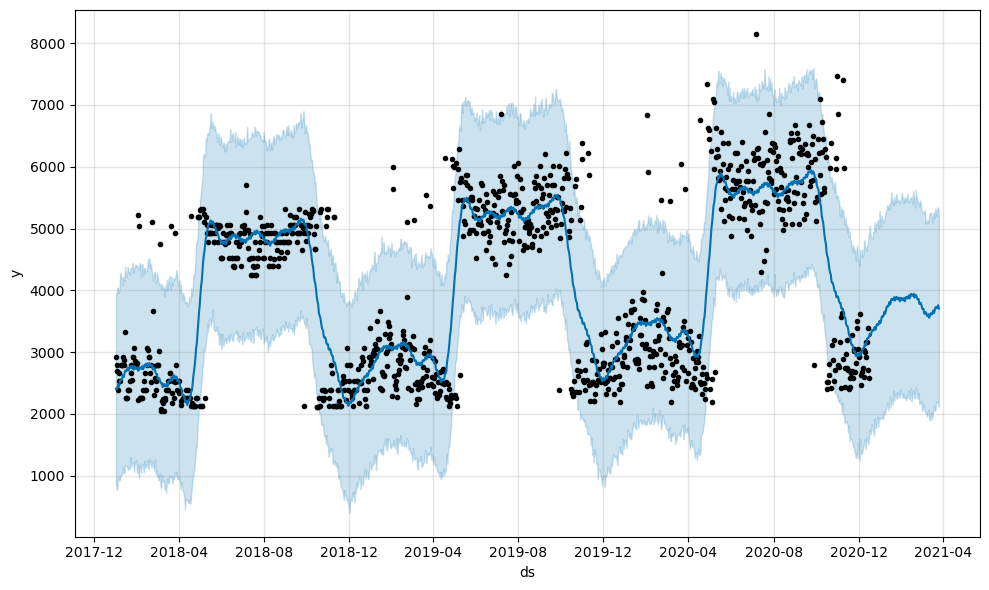

In [29]:
plot1 = m.plot(forecast)

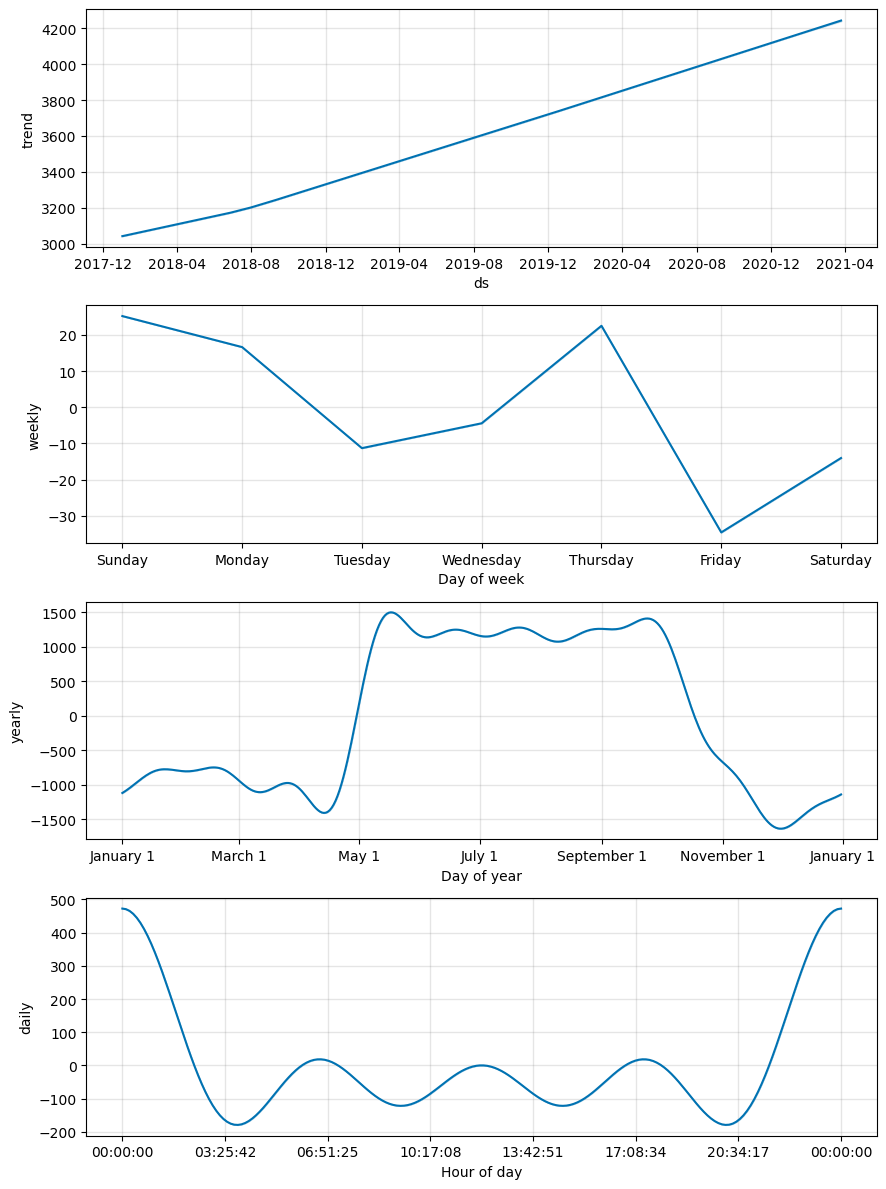

In [30]:
plot2 = m.plot_components(forecast)